In [49]:
import mlrose_hiive
from mlrose_hiive.generators import QueensGenerator
from mlrose_hiive.algorithms import GeomDecay
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

seed = 0
output_dir = 'output'
figure_dir = 'figures'
exp_name = 'NQ'

problem = QueensGenerator.generate(seed=seed, size=22)
max_attempts = problem.get_length()

In [2]:
restarts = [i for i in range(10, 201, 20)]
rhc_runner = mlrose_hiive.RHCRunner(problem,
                                    seed=seed,
                                    experiment_name=exp_name,
                                    iteration_list=[100000],
                                    output_directory=output_dir,
                                    restart_list=restarts,
                                    max_attempts=max_attempts)
rhc_stats, rhc_curve = rhc_runner.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[10], max_iters:[100000], current_restart:[0]
runner_name:[rhc], experiment_name:[NQ], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[16.0000]
	[12 15 21  0  3  3  7  9 19 21 18  4  6 12  1  6  7 14 17  5 13  8]...

restarts:[10], max_iters:[100000], current_restart:[0]
runner_name:[rhc], experiment_name:[NQ], attempt:[23], iteration:[78], done:[True], time:[0.05], fitness:[7.0000]
	[10  4  2  0 21  3  7  9 19 21 18 15  6 12  1  4  7 14 17  5 13  8]...

restarts:[10], max_iters:[100000], current_restart:[1]
runner_name:[rhc], experiment_name:[NQ], attempt:[0], iteration:[0], done:[False], time:[0.05], fitness:[20.0000]
	[ 1  8  0  4  6 21 13  7 15  9 18  8 15 11  6 15  1 12  3 18 15  3]...

restarts:[10], max_iters:[100000], current_restart:[1]
runner_name:[rhc], experiment_name:[NQ], attempt:[23], iteration:[64], done:[True], time:[0.08], fitness:[10.0000]
	[12  8  0  4  6 21 13  7  2  9 18 20 

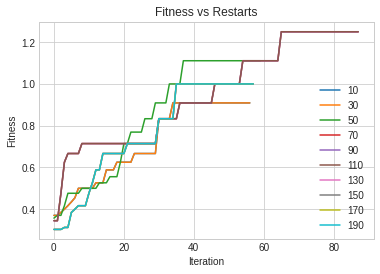

In [3]:
restarts_fit = []
ax = None
fig = plt.figure()
for re in restarts:
    rhc_curve_restart = rhc_curve[rhc_curve.Restarts == re]
    idx = rhc_curve_restart.Fitness.idxmax()
    best_restart_attempt = rhc_curve.iloc[idx].current_restart
    best_curve = rhc_curve.loc[(rhc_curve_restart.current_restart == best_restart_attempt) & (rhc_curve.Restarts == re)]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 10
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(restarts)
ax.set_title("Fitness vs Restarts")
fig.savefig(figure_dir + f"/{exp_name}_rhc_restarts.png")

In [4]:
init_temp = [1, 10, 50, 100, 250, 500, 1000]
sa_runner = mlrose_hiive.SARunner(problem,
                           seed=seed,
                           output=output_dir,
                           max_attempts=max_attempts,
                           experiment_name=exp_name,
                           iteration_list=[100000],
                           temperature_list=init_temp,
                           decay_list=[mlrose_hiive.GeomDecay],
                           )
sa_stats, sa_curve = sa_runner.run()

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000], output:[output]
runner_name:[sa], experiment_name:[NQ], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[16.0000]
	[12 15 21  0  3  3  7  9 19 21 18  4  6 12  1  6  7 14 17  5 13  8]...

schedule:[1], max_iters:[100000], output:[output]
runner_name:[sa], experiment_name:[NQ], attempt:[23], iteration:[177], done:[True], time:[0.10], fitness:[7.0000]
	[ 9 18  1 19 19  7  4 10 21 16 20 15 19 14  1  3 17  8  2  5  1 13]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[10], max_iters:[100000], output:[output]
runner_name:[sa], experiment_name:[NQ], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[16.0000]
	[12 15 21  0  3  3  7  9 19 21 18  4  6 12  1  6  7 14 17  5 13  8]...

schedule:[10], max_iters:[100000], output:[output]
runner_name:[sa], experiment_name:[NQ], attempt:[23], iteration:[345], d

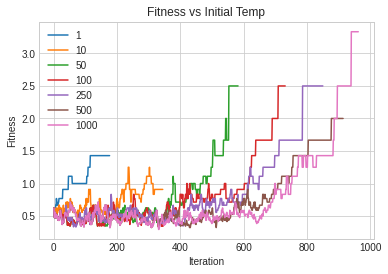

In [7]:
sa_curve['init_temp'] = sa_curve.Temperature.apply(lambda t: t.init_temp)
ax = None
fig = plt.figure()
for temp in init_temp:
    best_curve = sa_curve[sa_curve.init_temp == temp]
    # best_curve = rhc_curve.loc[(rhc_curve_restart.current_restart == best_restart_attempt) & (rhc_curve.Restarts == re)]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 10
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Fitness vs Initial Temp")
fig.savefig(figure_dir + f"/{exp_name}_sa_init_temp.png")

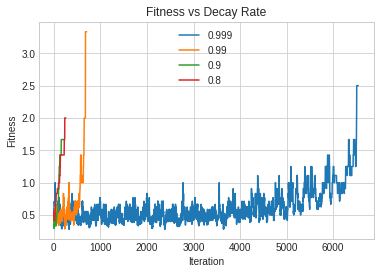

In [9]:
decay_rate = [0.999, 0.99, 0.9, 0.8]
out = None
fig = plt.figure()
for dr in decay_rate:
    schedule = GeomDecay(init_temp=250, decay=dr)
    s,f,curve = mlrose_hiive.simulated_annealing(problem,
                                                 schedule=schedule,
                                                 max_attempts=max_attempts,
                                                 max_iters=100000,
                                                 random_state=seed,
                                                 curve=True)
    df = pd.DataFrame(curve)
    df['true_fit'] = 10/df[0]
    ax = df.true_fit.plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(decay_rate)
ax.set_title("Fitness vs Decay Rate")
fig.savefig(figure_dir + f"/{exp_name}_sa_decay_rate.png")

In [10]:
population = [50, 100, 250, 500, 1000]
mutations_rates = [0.01, 0.1, 0.25, 0.5]


In [11]:
ga_population_runner = mlrose_hiive.GARunner(problem,
                                  seed=seed,
                                  output=output_dir,
                                  max_attempts=max_attempts,
                                  experiment_name=exp_name+'_population',
                                  iteration_list=[100000],
                                  population_sizes=population,
                                  mutation_rates=[0.1]
                                  )

ga_population_stats, ga_population_curve = ga_population_runner.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[50], mutation_prob:[0.1], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[NQ_population], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[16.0000]
	[12 15 21  0  3  3  7  9 19 21 18  4  6 12  1  6  7 14 17  5 13  8]...

pop_size:[50], mutation_prob:[0.1], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[NQ_population], attempt:[23], iteration:[86], done:[True], time:[1.82], fitness:[2.0000]
	[15  9 20 14  2  0  7 11  0 19  6  1 21 18 13  4 10 17  3 16  0  8]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[100], mutation_prob:[0.1], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[NQ_population], attempt:[0], iteration:[0], done:[False], time:[0.04], fitness:[16.0000]
	[12 15 21  0  3  3  7  9 19 21 18  4  6 12  1  6  7 14 17  5 13  8]...

pop_size:[100], mutation_

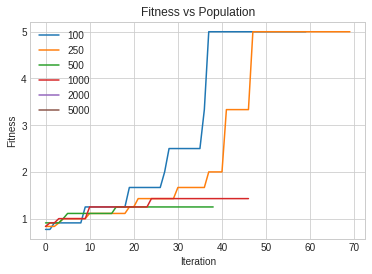

In [28]:
fig = plt.figure()

for ppl in population:
    best_curve = ga_population_curve[ga_population_curve['Population Size'] == ppl]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 10
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(population)
ax.set_title("Fitness vs Population")
fig.savefig(figure_dir + f"/{exp_name}_ga_population.png")

In [17]:
ga_mut_runner = mlrose_hiive.GARunner(problem,
                                  seed=seed,
                                  output=output_dir,
                                  max_attempts=max_attempts,
                                  experiment_name=exp_name+'_mutation',
                                  iteration_list=[100000],
                                  population_sizes=[100],
                                  mutation_rates=mutations_rates
                                  )

ga_mut_stats, ga_mut_curve = ga_mut_runner.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[100], mutation_prob:[0.01], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[NQ_mutation], attempt:[0], iteration:[0], done:[False], time:[0.06], fitness:[16.0000]
	[12 15 21  0  3  3  7  9 19 21 18  4  6 12  1  6  7 14 17  5 13  8]...

pop_size:[100], mutation_prob:[0.01], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[NQ_mutation], attempt:[23], iteration:[66], done:[True], time:[2.96], fitness:[3.0000]
	[20  8 13  5  0 19  6 15 21  4  1 16  4 10 20  2 17  9  3 12 18  7]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[100], mutation_prob:[0.1], max_iters:[100000], output:[output]
runner_name:[ga], experiment_name:[NQ_mutation], attempt:[0], iteration:[0], done:[False], time:[0.04], fitness:[16.0000]
	[12 15 21  0  3  3  7  9 19 21 18  4  6 12  1  6  7 14 17  5 13  8]...

pop_size:[100], mutation_pr

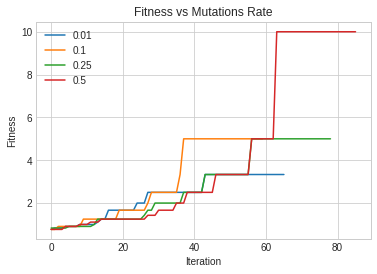

In [27]:
fig = plt.figure()
for mu in mutations_rates:
    best_curve = ga_mut_curve[ga_mut_curve['Mutation Rate'] == mu]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 10
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(mutations_rates)
ax.set_title("Fitness vs Mutations Rate")
fig.savefig(figure_dir + f"/{exp_name}_ga_mutations.png")

In [20]:
population = [100, 250, 500, 1000, 2000, 5000]
keep_percent = [0.01, 0.1, 0.2, 0.4, 0.6]


In [21]:
mimic_population_runner = mlrose_hiive.MIMICRunner(problem,
                                      seed=seed,
                                      output=output_dir,
                                      max_attempts=max_attempts,
                                      experiment_name=exp_name+'_population',
                                      iteration_list=[100000],
                                        population_sizes=population,
                                        keep_percent_list=[0.2])
mimic_population_stats, mimic_population_curve = mimic_population_runner.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.2], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[NQ_population], attempt:[0], iteration:[0], done:[False], time:[0.07], fitness:[16.0000]
	[12 15 21  0  3  3  7  9 19 21 18  4  6 12  1  6  7 14 17  5 13  8]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.2], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[NQ_population], attempt:[23], iteration:[25], done:[True], time:[4.81], fitness:[11.0000]
	[16.  3.  7.  0.  4. 17.  1.  8. 17. 20.  2.  5.  5. 10. 12. 21.  2. 15.// 21.  7.  7. 11.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[250], keep_pct:[0.2], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[NQ_population], attempt:[0], iteration:[0], done:[False], time:[0.09], fitness:[16.0000]
	[

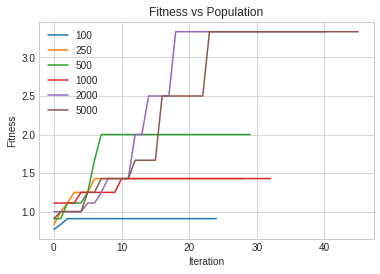

In [23]:
fig = plt.figure()

for ppl in population:
    best_curve = mimic_population_curve[mimic_population_curve['Population Size'] == ppl]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 10
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(population)
ax.set_title("Fitness vs Population")
fig.savefig(figure_dir + f"/{exp_name}_mimic_population.png")

In [24]:
mimic_keep_runner = mlrose_hiive.MIMICRunner(problem,
                                      seed=seed,
                                      output=output_dir,
                                      max_attempts=max_attempts,
                                      experiment_name=exp_name+'_population',
                                      iteration_list=[100000],
                                        population_sizes=[2000],
                                        keep_percent_list=keep_percent)

mimic_keep_stats, mimic_keep_curve = mimic_keep_runner.run()


Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[2000], keep_pct:[0.01], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[NQ_population], attempt:[0], iteration:[0], done:[False], time:[0.84], fitness:[16.0000]
	[12 15 21  0  3  3  7  9 19 21 18  4  6 12  1  6  7 14 17  5 13  8]...

use_fast_mimic:[False], pop_size:[2000], keep_pct:[0.01], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[NQ_population], attempt:[23], iteration:[26], done:[True], time:[24.24], fitness:[5.0000]
	[21. 15.  8.  1. 14.  2. 13. 10.  7. 19.  4. 11. 11.  0. 18.  5. 17.  9.// 20.  8. 16.  6.]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[2000], keep_pct:[0.1], max_iters:[100000], output:[output]
runner_name:[mimic], experiment_name:[NQ_population], attempt:[0], iteration:[0], done:[False], time:[0.74], fitness:[16.000

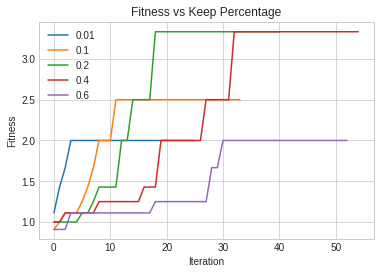

In [33]:
fig = plt.figure()
for kp in keep_percent:
    best_curve = mimic_keep_curve[mimic_keep_curve['Keep Percent'] == kp]
    best_curve.reset_index(inplace=True)
    best_curve['true_fit'] = 1/ best_curve.Fitness * 10
    ax = best_curve['true_fit'].plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(keep_percent)
ax.set_title("Fitness vs Keep Percentage")
fig.savefig(figure_dir + f"/{exp_name}_mimic_keep.png")

       Iteration      Time  Fitness  Restarts  max_iters  current_restart  \
23557      23557  8.028442     29.0       110     100000               70   
23558      23558  8.029044     29.0       110     100000               70   
23559      23559  8.029650     21.0       110     100000               70   
23560      23560  8.118946     16.0       110     100000               70   
23561      23561  8.120465     15.0       110     100000               70   
...          ...       ...      ...       ...        ...              ...   
23640      23640  8.173170      8.0       110     100000               70   
23641      23641  8.173782      8.0       110     100000               70   
23642      23642  8.266206      8.0       110     100000               70   
23643      23643  8.267859      8.0       110     100000               70   
23644      23644  8.268488      8.0       110     100000               70   

       true_fit  true_time  
23557  0.344828   0.000000  
23558  0.344828  

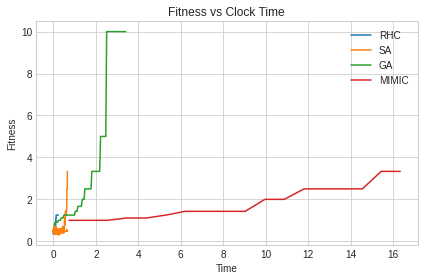

In [48]:
fig, ax = plt.subplots()

best_rhc_curve = rhc_curve[rhc_curve.Restarts == 110]
idx = best_rhc_curve.Fitness.idxmax()
best_restart_attempt = rhc_curve.iloc[idx].current_restart
best_rhc_curve = rhc_curve.loc[(best_rhc_curve.current_restart == best_restart_attempt) & (rhc_curve.Restarts == 110)]
best_rhc_curve['true_fit'] = 1/ best_rhc_curve.Fitness * 10
best_rhc_curve['true_time'] = best_rhc_curve.Time - best_rhc_curve.iloc[0].Time
best_rhc_curve.plot(x='true_time', y='true_fit', ax=ax)
# best_rhc_curve.plot(x='Time', y='true_fit', ax=ax)
print(best_rhc_curve)
best_sa_curve = sa_curve[sa_curve.init_temp == 1000]
best_sa_curve['true_fit'] = 1/ best_sa_curve.Fitness * 10
best_sa_curve = best_sa_curve.iloc[2:]
best_sa_curve.plot(x='Time', y='true_fit',ax=ax)
# print(best_sa_curve.describe())

best_ga_curve = ga_mut_curve[ga_mut_curve['Mutation Rate'] == 0.5]
best_ga_curve['true_fit'] = 1/ best_ga_curve.Fitness * 10
best_ga_curve = best_ga_curve.iloc[3:]
best_ga_curve.plot(x='Time', y='true_fit',ax=ax)
# print(best_ga_curve)


best_mimic_curve = mimic_keep_curve[mimic_keep_curve['Keep Percent'] == 0.2]
best_mimic_curve['true_fit'] = 1/ best_mimic_curve.Fitness * 10
best_mimic_curve = best_mimic_curve.iloc[2:20]

# print(best_mimic_curve)
best_mimic_curve.plot(x='Time', y='true_fit', ax=ax, xlabel='Time')
ax.legend(["RHC", "SA", "GA", "MIMIC"])
ax.set_xlabel("Time")
ax.set_ylabel("Fitness")
ax.set_title("Fitness vs Clock Time")
ax.get_figure().tight_layout()
fig.savefig(figure_dir + f"/{exp_name}_comp.png", transparent=False)
